## Collinearity

Identify how strongly predictor variables are related to house sales price and presence of strong collinearity between predictor variables themselves

### Housekeeping

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [3]:
# Global Variables
%store -r CONTINUOUS_VARIABLES
%store -r DISCRETE_VARIABLES
%store -r TARGET_VARIABLE
%store -r filename

In [4]:
# Show all the columns in data frame
pd.set_option("display.max_columns", 120)

In [5]:
sns.set_style("white")

### Loading the cleaned data

In [6]:
df = pd.read_csv('data/{}-clean.csv'.format(filename))

In [7]:
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,1,2008,WD,Normal,118000


### Encode the ordinal variables

In [8]:
VARIABLES = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'ExterCond', 'ExterQual', 
             'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape',
             'OverallCond', 'OverallQual', 'PavedDrive', 'Utilities']

In [9]:
for column in df.columns:
    if column in VARIABLES:
        df[column] = df[column].astype('category')
        df[column] = df[column].cat.codes.astype(int)    

In [10]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,856,GasA,0,Y,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,548,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,1262,GasA,0,Y,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,460,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,920,GasA,0,Y,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,608,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,756,GasA,2,Y,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,642,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,1145,GasA,0,Y,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,836,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000


### Linear Combinations

In [11]:
# The total square feet of the house is a sum of the total living area across floors and the total basement area
df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]

In [12]:
# Total porch area of the house
df["TotalPorchSF"] = (
    df["3SsnPorch"] + df["EnclosedPorch"] + df["OpenPorchSF"]
    + df["ScreenPorch"] + df["WoodDeckSF"]
)

In [13]:
# Total number of bathrooms in the house
df["TotalBath"] = (
    df["FullBath"] + 0.5 * df["HalfBath"]
    + df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"]
)

In [14]:
# Add new columns to list of continuous variables
CONTINUOUS_VARIABLES.extend(['TotalSF','TotalPorchSF','TotalBath'])
CONTINUOUS_VARIABLES

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LowQualFinSF',
 'MasVnrArea',
 'OpenPorchSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'TotalSF',
 'TotalPorchSF',
 'TotalBath']

In [15]:
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath
0,1,60,RL,8450,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,856,GasA,0,Y,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,548,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500,2566,61,3.5
1,2,20,RL,9600,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,1262,GasA,0,Y,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,460,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500,2524,298,2.5
2,3,60,RL,11250,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,920,GasA,0,Y,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,608,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500,2706,42,3.5
3,4,70,RL,9550,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,756,GasA,2,Y,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,642,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,2473,307,2.0
4,5,60,RL,14260,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,1145,GasA,0,Y,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,836,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000,3343,276,3.5
5,6,50,RL,14115,Pave,0,Lvl,0,Inside,0,Mitchel,Norm,Norm,1Fam,1.5Fin,4,4,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,3,4,Wood,2,3,3,2,732,5,0,64,796,GasA,0,Y,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,Attchd,2,2,480,4,4,2,40,30,0,320,0,0,10,2009,WD,Normal,143000,2158,390,2.5
6,7,20,RL,10084,Pave,3,Lvl,0,Inside,0,Somerst,Norm,Norm,1Fam,1Story,7,4,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,2,4,PConc,0,3,0,2,1369,5,0,317,1686,GasA,0,Y,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,Attchd,1,2,636,4,4,2,255,57,0,0,0,0,8,2007,WD,Normal,307000,3380,312,3.0
7,8,60,RL,10382,Pave,0,Lvl,0,Corner,0,NWAmes,PosN,Norm,1Fam,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,3,4,CBlock,2,3,2,0,859,1,32,216,1107,GasA,0,Y,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,Attchd,1,2,484,4,4,2,235,204,228,0,0,0,11,2009,WD,Normal,200000,3197,667,3.5
8,9,50,RM,6120,Pave,3,Lvl,0,Inside,0,OldTown,Artery,Norm,1Fam,1.5Fin,6,4,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,3,4,BrkTil,3,3,3,5,0,5,0,952,952,GasA,2,Y,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,Detchd,2,2,468,1,4,2,90,0,205,0,0,0,4,2008,WD,Abnorml,129900,2726,295,2.0
9,10,190,RL,7420,Pave,3,Lvl,0,Corner,0,BrkSide,Artery,Artery,2fmCon,1.5Unf,4,5,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,BrkTil,3,3,3,2,851,5,0,140,991,GasA,0,Y,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,Attchd,1,1,205,2,4,2,0,4,0,0,0,0,1,2008,WD,Normal,118000,2068,4,2.0


### Population Distribution

For the continuous predictors in our dataset, it is worthwhile to check if they belong to a normal distribution
- **TotalSF**
- **TotalPorchSF**
- **GarageArea**
- **GrLivArea**
- **LotArea**
- **TotalBsmtSF**

In [16]:
# Function to plot a histogram and a Q-Q plot
def distribution_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

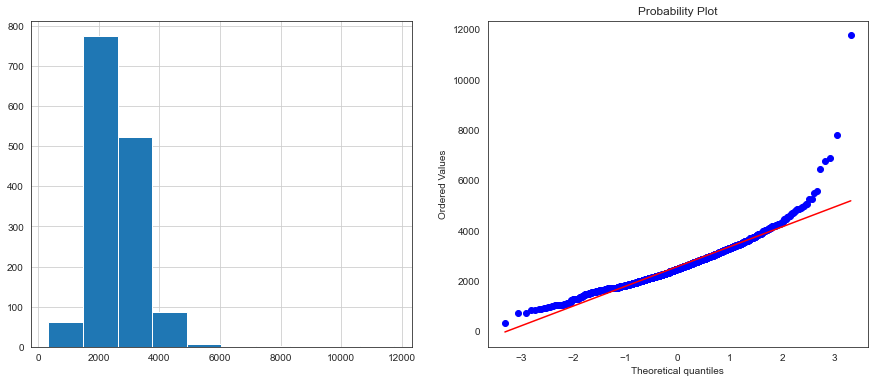

In [17]:
distribution_plots(df, 'TotalSF')

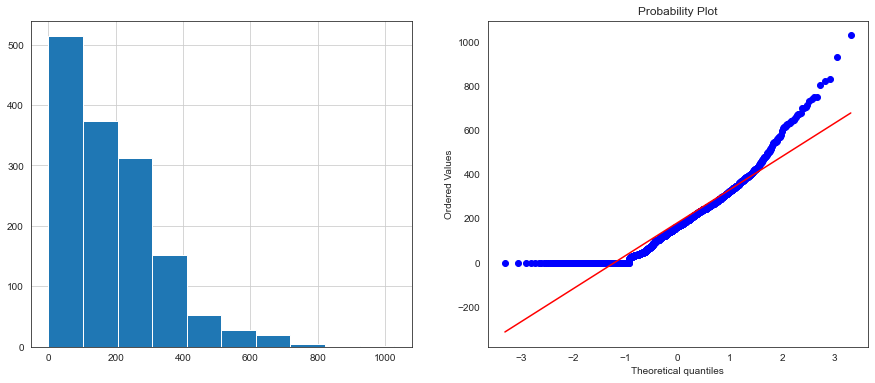

In [18]:
distribution_plots(df, 'TotalPorchSF')

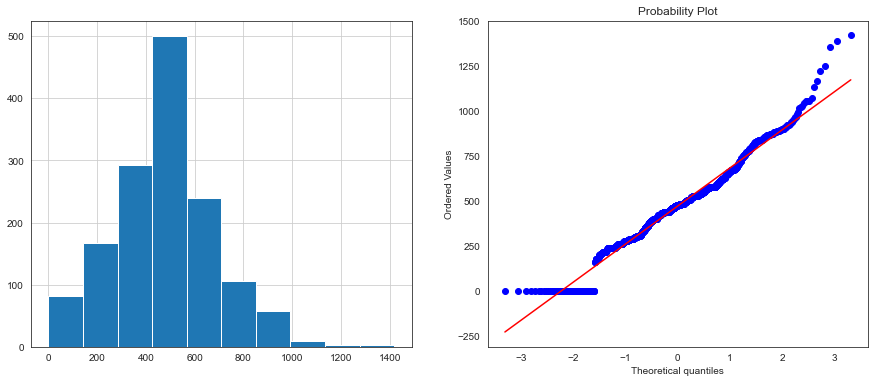

In [19]:
distribution_plots(df, 'GarageArea')

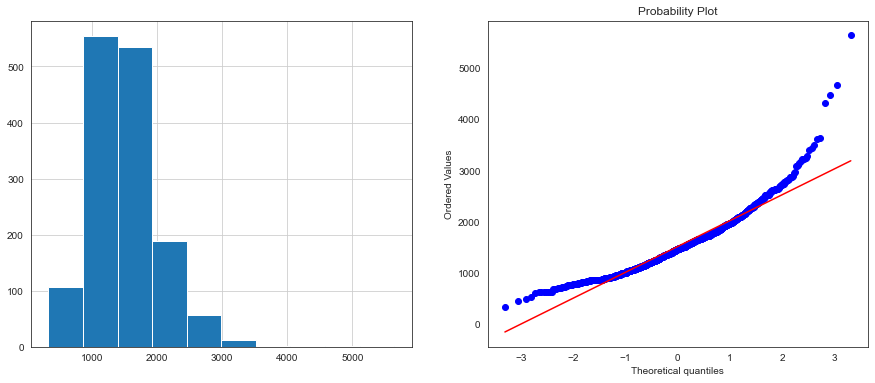

In [20]:
distribution_plots(df, 'GrLivArea')

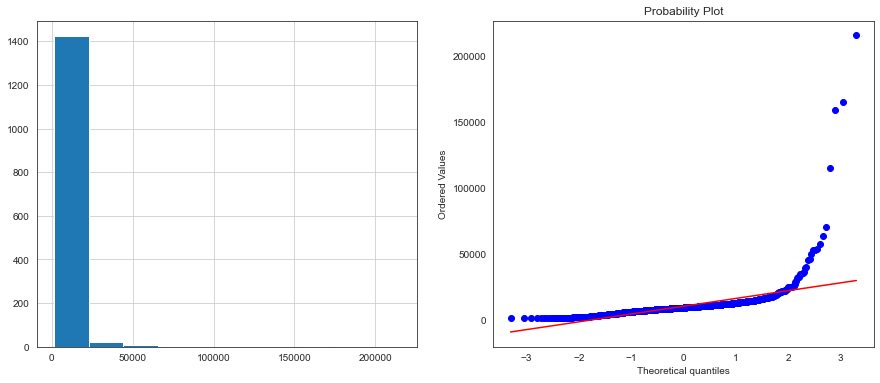

In [21]:
distribution_plots(df, 'LotArea')

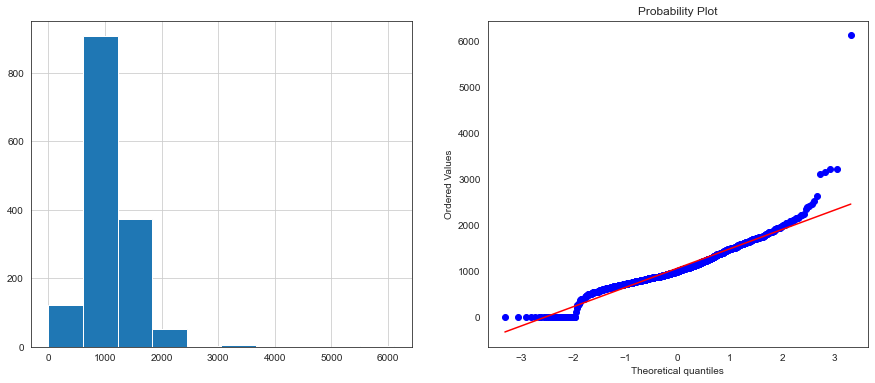

In [22]:
distribution_plots(df, 'TotalBsmtSF')

### BoxCox Transformation

Check the Box-Cox tranformations for each column seperately to decide lambda is in an acceptable range
A common convention is to use Box-Cox transformations only if the found lambda value (estimated with Maximum Likelyhood Estimation) is in the range from -3 to +3

In [23]:
data = df.copy()

Lambda:  0.21721556546669982


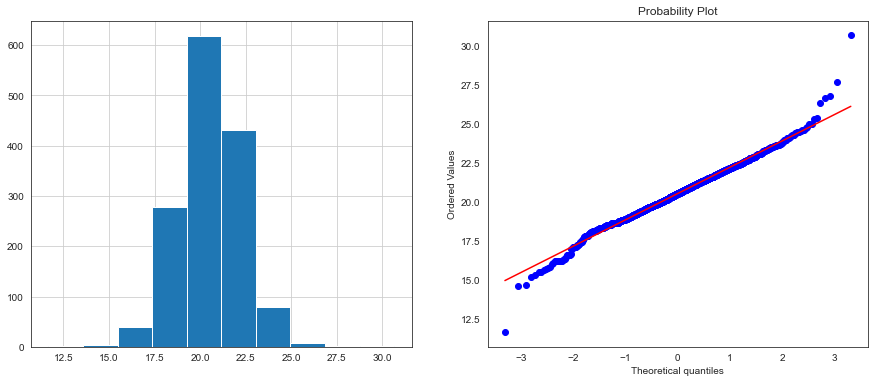

In [24]:
# Total SF
data['TotalSF'], param = stats.boxcox(data['TotalSF'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'TotalSF')

Lambda:  0.42101892751120834


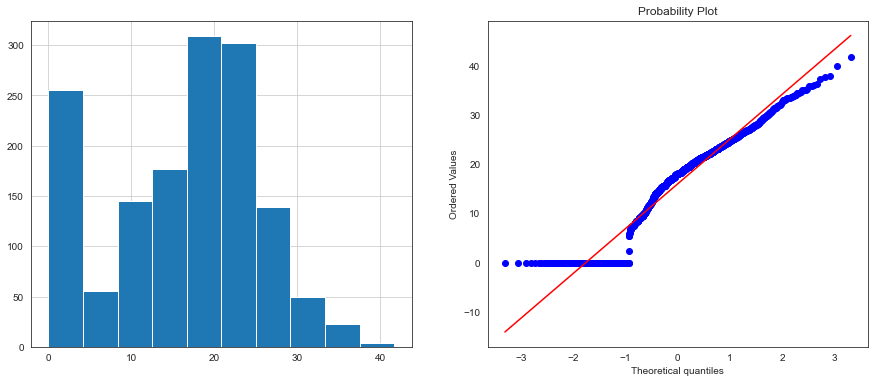

In [25]:
# Total Porch SF
data['TotalPorchSF'], param = stats.boxcox(data['TotalPorchSF'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'TotalPorchSF')

Lambda:  0.811258024639934


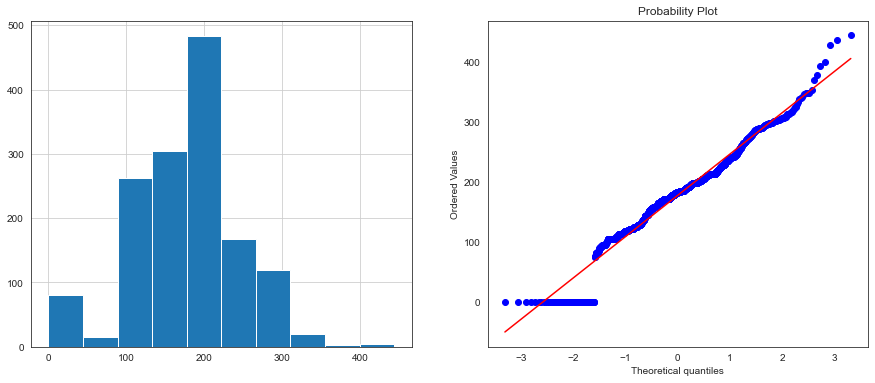

In [26]:
# Total Garage Area
data['GarageArea'], param = stats.boxcox(data['GarageArea'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'GarageArea')

Lambda:  0.005539590340057866


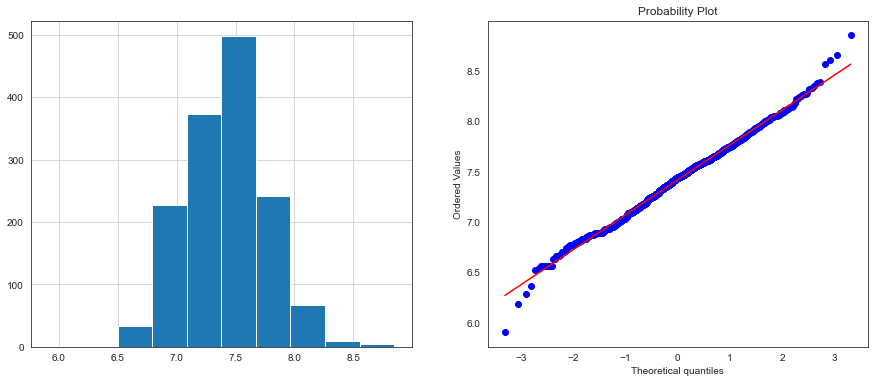

In [27]:
# Total Living Area above ground
data['GrLivArea'], param = stats.boxcox(data['GrLivArea'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'GrLivArea')

Lambda:  0.030818521797411468


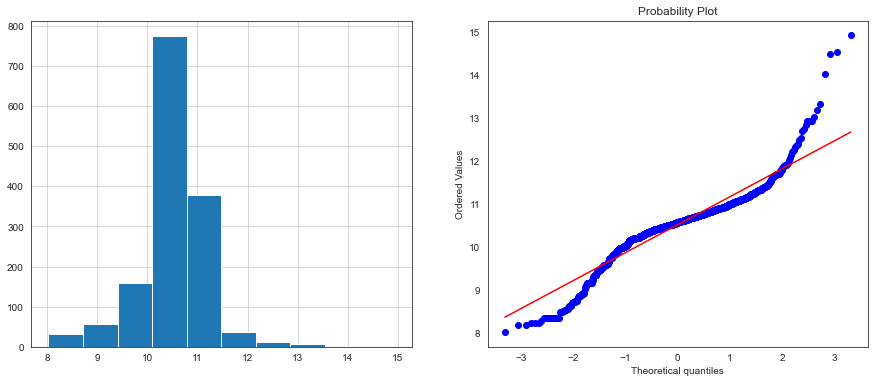

In [28]:
# Total lot size
data['LotArea'], param = stats.boxcox(data['LotArea'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'LotArea')

Lambda:  0.7396016878493652


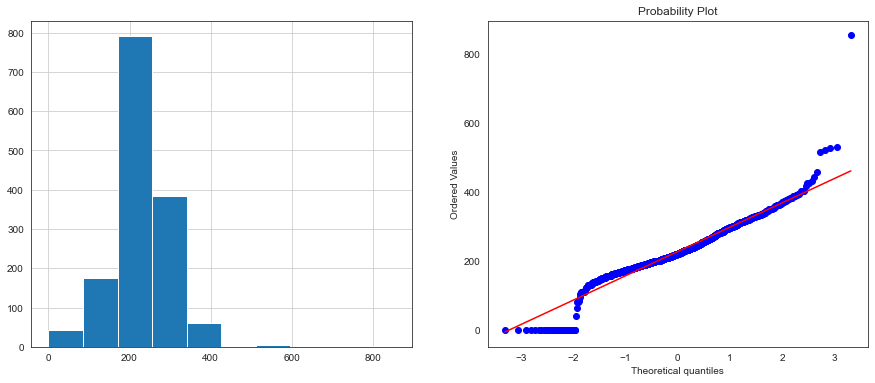

In [29]:
# Total Basement Area
data['TotalBsmtSF'], param = stats.boxcox(data['TotalBsmtSF'] + 1) 
print('Lambda: ', param)
distribution_plots(data, 'TotalBsmtSF')

Since lambda values for all the variables are within the acceptable range we will go ahead with the applicable transformation on each of these columns separately

   - **TotalSF**     : 0.21721556546669982
   - **TotalPorchSF**: 0.42101892751120834
   - **GarageArea**  : 0.811258024639934
   - **GrLivArea**   : 0.005539590340057866
   - **LotArea**     : 0.030818521797411468
   - **TotalBsmtSF** : 0.7396016878493652



In [30]:
# Applying boxcox transformation on each of the above columns
df['TotalSF'], param = stats.boxcox(df['TotalSF'] + 1) 
df['TotalPorchSF'], param = stats.boxcox(df['TotalPorchSF'] + 1) 
df['GarageArea'], param = stats.boxcox(df['GarageArea'] + 1) 
df['GrLivArea'], param = stats.boxcox(df['GrLivArea'] + 1) 
df['LotArea'], param = stats.boxcox(df['LotArea'] + 1) 
df['TotalBsmtSF'], param = stats.boxcox(df['TotalBsmtSF'] + 1) 

In [31]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath
0,1,60,RL,10.427530,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,198.284295,GasA,0,Y,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500,20.729442,11.124668,3.5
1,2,20,RL,10.596444,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,264.601145,GasA,0,Y,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500,20.638826,23.806809,2.5
2,3,60,RL,10.807339,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,209.206786,GasA,0,Y,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500,21.023347,9.197105,3.5
3,4,70,RL,10.589518,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,180.779930,GasA,2,Y,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,20.527193,24.135762,2.0
4,5,60,RL,11.124528,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,246.150776,GasA,0,Y,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000,22.227136,22.977765,3.5


### Correlation of predictors with target variable

Continuous variables are assumed to be either linearly related or not related to the target: **Pearson's correlation coefficient**    
Discrete variables are assumed to be either monotonically related or not related to the target: **Spearman's rank correlation coefficient**

In [32]:
def plot_correlation(data, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(title, fontsize=24)
    # Blank out the upper triangular part of the matrix.
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Use a diverging color map.
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    # Adjust the labels' font size.
    labels = data.columns
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels(labels, fontsize=10)
    # Plot it.
    sns.heatmap(
        data, vmin=-1, vmax=1, cmap=cmap, center=0, linewidths=.5,
        cbar_kws={"shrink": .5}, square=True, mask=mask, ax=ax
    )

Pearson's correlation coefficient shows a linear relationship between two variables.

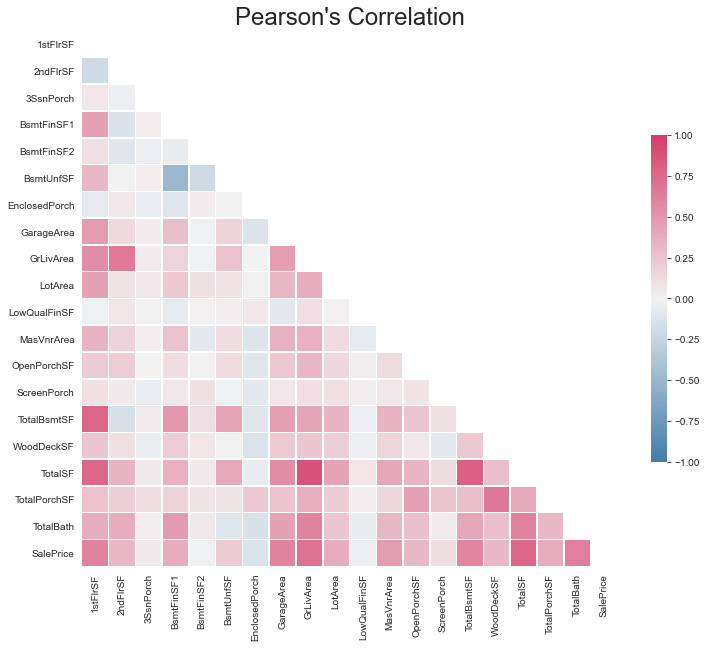

In [33]:
columns = CONTINUOUS_VARIABLES + TARGET_VARIABLE
pearson = df[columns].corr(method="pearson")
plot_correlation(pearson, "Pearson's Correlation")

Spearman's correlation coefficient shows an ordinal rank relationship between two variables.

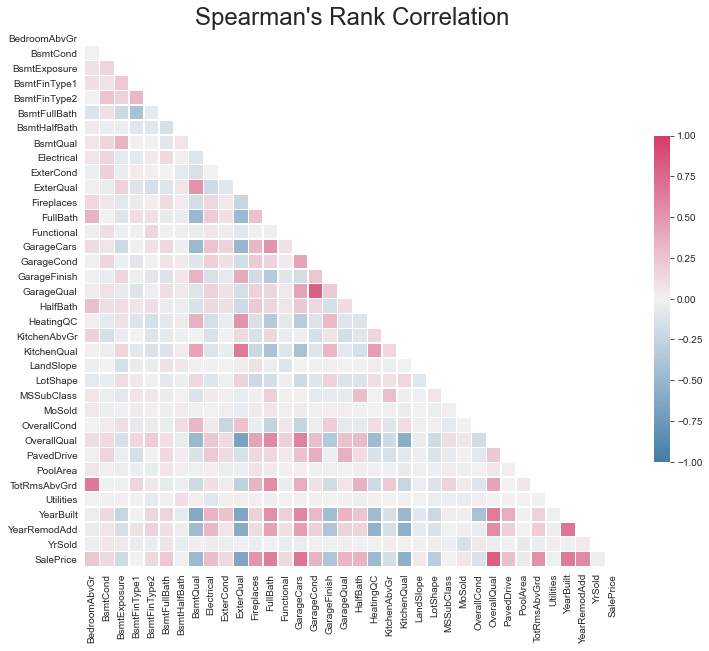

In [34]:
columns = sorted(DISCRETE_VARIABLES) + TARGET_VARIABLE
spearman = df[columns].corr(method="spearman")
plot_correlation(spearman, "Spearman's Rank Correlation")

A correlation between 0.33 and 0.65 is considered weak while a correlation above 0.66 is considered strong 
(these thresholds refer to the absolute value of the correlation). Correlations are calculated for the target variable (i.e.,"SalePrice"). Correlations below 0.1 are considered 
"uncorrelated".

In [56]:
strong = 0.65
weak = 0.33
uncorrelated = 0.1

In [57]:
# Group the continuous predictors based on how strongly they are correlated to Sales Price
pearson_weakly_correlated = set()
pearson_strongly_correlated = set()
pearson_uncorrelated = set()

target = TARGET_VARIABLE[0]
corrs = pearson.loc[target].drop(TARGET_VARIABLE).abs()
pearson_weakly_correlated |= set(corrs[(weak < corrs) & (corrs <= strong)].index)
pearson_strongly_correlated |= set(corrs[(strong < corrs)].index)
pearson_uncorrelated |= set(corrs[(corrs < uncorrelated)].index)

In [58]:
# Group the discrete predictors based on how strongly they are correlated to Sales Price
spearman_weakly_correlated = set()
spearman_strongly_correlated = set()
spearman_uncorrelated = set()

target = TARGET_VARIABLE[0]
corrs = spearman.loc[target].drop(TARGET_VARIABLE).abs()
spearman_weakly_correlated |= set(corrs[(weak < corrs) & (corrs <= strong)].index)
spearman_strongly_correlated |= set(corrs[(strong < corrs)].index)
spearman_uncorrelated |= set(corrs[(corrs < uncorrelated)].index)

In [59]:
# Printing the predictors based on correlation strength with target variable
print('\033[1m' + "\nVariables weakly correlated with SalePrice: \033[0m", list(pearson_weakly_correlated)+list(spearman_weakly_correlated))
print('\033[1m' + "\nVariables strongly correlated with SalePrice: \033[0m", list(pearson_strongly_correlated)+list(spearman_strongly_correlated))
print('\033[1m' + "\nVariables uncorrelated with SalePrice: \033[0m", list(pearson_uncorrelated)+list(spearman_uncorrelated))


Variables weakly correlated with SalePrice:  ['1stFlrSF', 'BsmtFinSF1', 'MasVnrArea', 'TotalBsmtSF', 'TotalBath', 'LotArea', 'TotalPorchSF', 'GarageArea', 'ExterQual', 'Fireplaces', 'GarageFinish', 'HeatingQC', 'TotRmsAbvGrd', 'KitchenQual', 'FullBath', 'BsmtQual', 'YearRemodAdd', 'GarageCond', 'HalfBath']

Variables strongly correlated with SalePrice:  ['TotalSF', 'GrLivArea', 'OverallQual', 'GarageCars', 'YearBuilt']

Variables uncorrelated with SalePrice:  ['LowQualFinSF', 'BsmtFinSF2', '3SsnPorch', 'YrSold', 'LandSlope', 'BsmtHalfBath', 'BsmtFinType1', 'Utilities', 'MSSubClass', 'MoSold', 'PoolArea']


Checking for presence of multicollinearity among the predictor variables

In [60]:
pearson_cp = pearson.copy()
pearson_cp = pearson_cp.drop(TARGET_VARIABLE, axis = 0)
pearson_cp = pearson_cp.drop(TARGET_VARIABLE, axis = 1)

In [61]:
rows = pearson_cp.columns
cols = pearson_cp.columns

for idx, col in enumerate(cols):
    for idx1, row in enumerate(rows):
        if ((pearson_cp.iloc[idx1][idx].item() < -0.5) | (pearson_cp.iloc[idx1][idx].item() > 0.5) & (row != col)):
            print(row+'-'+col+':'+str(pearson_cp.iloc[idx1][idx].item()))           

GrLivArea-1stFlrSF:0.55156870318502
TotalBsmtSF-1stFlrSF:0.7669055191872683
TotalSF-1stFlrSF:0.7598272312887524
GrLivArea-2ndFlrSF:0.663230353937555
TotalBsmtSF-BsmtFinSF1:0.5006723392793881
TotalSF-GarageArea:0.5478812153881993
1stFlrSF-GrLivArea:0.55156870318502
2ndFlrSF-GrLivArea:0.663230353937555
TotalSF-GrLivArea:0.8714045739270466
TotalBath-GrLivArea:0.6069627731196545
1stFlrSF-TotalBsmtSF:0.7669055191872683
BsmtFinSF1-TotalBsmtSF:0.5006723392793881
TotalSF-TotalBsmtSF:0.8037361857059431
TotalPorchSF-WoodDeckSF:0.6675138320888115
1stFlrSF-TotalSF:0.7598272312887524
GarageArea-TotalSF:0.5478812153881993
GrLivArea-TotalSF:0.8714045739270466
TotalBsmtSF-TotalSF:0.8037361857059431
TotalBath-TotalSF:0.6112875425041426
WoodDeckSF-TotalPorchSF:0.6675138320888115
GrLivArea-TotalBath:0.6069627731196545
TotalSF-TotalBath:0.6112875425041426


### Transformed Data

In [62]:
df.shape

(1460, 76)

In [63]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath
0,1,60,RL,10.427530,Pave,3,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,4,PConc,2,3,3,2,706,5,0,150,198.284295,GasA,0,Y,4,856,854,0,7.600483,1,0,2,1,3,1,2,8,6,0,Attchd,1,2,204.517915,4,4,2,0,61,0,0,0,0,2,2008,WD,Normal,208500,20.729442,11.124668,3.5
1,2,20,RL,10.596444,Pave,3,Lvl,0,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,5,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,4,CBlock,2,3,1,0,978,5,0,284,264.601145,GasA,0,Y,4,1262,0,0,7.284379,0,1,2,0,3,1,3,6,6,1,Attchd,1,2,177.329636,4,4,2,298,0,0,0,0,0,5,2007,WD,Normal,181500,20.638826,23.806809,2.5
2,3,60,RL,10.807339,Pave,0,Lvl,0,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,6,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,4,PConc,2,3,2,2,486,5,0,434,209.206786,GasA,0,Y,4,920,866,0,7.645779,1,0,2,1,3,1,2,6,6,1,Attchd,1,2,222.579733,4,4,2,0,42,0,0,0,0,9,2008,WD,Normal,223500,21.023347,9.197105,3.5
3,4,70,RL,10.589518,Pave,0,Lvl,0,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,6,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,4,BrkTil,3,1,3,0,216,5,0,540,180.779930,GasA,2,Y,4,961,756,0,7.604738,1,0,1,0,3,1,2,7,6,1,Detchd,2,3,232.664362,4,4,2,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,20.527193,24.135762,2.0
4,5,60,RL,11.124528,Pave,0,Lvl,0,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,7,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,4,PConc,2,3,0,2,655,5,0,490,246.150776,GasA,0,Y,4,1145,1053,0,7.862154,1,0,2,1,4,1,2,9,6,1,Attchd,1,3,288.451992,4,4,2,192,84,0,0,0,0,12,2008,WD,Normal,250000,22.227136,22.977765,3.5


In [64]:
df.to_csv('data/{}-transformed.csv'.format(filename), index=False)

In [65]:
# Global variables
%store CONTINUOUS_VARIABLES
%store DISCRETE_VARIABLES
%store TARGET_VARIABLE
%store filename

Stored 'CONTINUOUS_VARIABLES' (list)
Stored 'DISCRETE_VARIABLES' (list)
Stored 'TARGET_VARIABLE' (list)
Stored 'filename' (str)
